# [IUM] Dokumentacja wstępna
**Autorzy:**  
Gustaw Malinowski (324872), Kacper Straszak (325234), Aleksandra Szymańska (318733)  
**Data:** 24.11.2024 r.

---

## Oryginalna treść zadania
**Zadanie 10:**  
“Jakiś czas temu wprowadziliśmy konta premium, które uwalniają użytkowników od słuchania reklam. Nie są one jednak jeszcze zbyt popularne – czy możemy się dowiedzieć, które osoby są bardziej skłonne do zakupu takiego konta?”

---

## Analiza z perspektywy Biznesowej

### Opis problemu biznesowego
Naszym celem jest określenie i lepsze zrozumienie profilu osoby skłonnej do zakupu konta premium w oparciu o dane o użytkownikach, ich sesjach użytkowania, artystach, utworach oraz sposobie ich przechowywania zbieranych przez serwis. Na tej podstawie firma będzie mogła podjąć decyzję o strategiach marketingowych skutecznych przy nakłanianiu do zakupu kont premium (personalizacji reklam oraz oferty) i zwiększyć zysk płynący z tego typu oferowanych usług.

---

### Założenia
- Ponieważ klient nie ponosi kosztów, uznajemy, że zwrot z inwestycji w stosunku do kosztów zawsze będzie nieskończony.
- Klient nie dysponuje istniejącym rozwiązaniem, które musielibyśmy "pokonać".
- Dobrze by było gdyby model byłinterpretowalny lecz nie jest to kluczowe. Pozwoliłoby to na np. dobieranie ilości reklam tak aby nakłonić użytkownika na zakup konta premium.
- Zakładamy zdroworozsądkowe ograniczenia dotyczące prędkości obliczeń (czas obliczeń dla pojedynczego użytkownika nie powinien być zauważalny).

---

### Wymagania klienta
**Wymagania biznesowe**

Od strony zastosowań biznesowych klient nie ma jasno sprecyzowanych wymagań. Oczekuje jedynie rozwiązania, które umożliwi mu dostosowanie rekomendacji.  

**Pozostałe wymagania**
- Dostarczenie gotowego rozwiązania maksymalnie do 17.01.2025.
- Rozwiązanie w postaci mikroserwisu umożliwiającego łatwe wykorzystanie modelu w produkcji.
- Dostarczenie dwóch modeli oraz porównanie ich wyników.
- Wykonanie eksperymentu A/B porównującego dwa modele.

---

### Proponowane biznesowe kryteria sukcesu
Rozwiązanie pozwoli klientowi zwiększyć liczbę zakupów kont premium poprzez precyzyjniejsze targetowanie reklam, zamiast dotychczasowego szerokiego serwowania ich do wszystkich użytkowników.

---

## Analiza z perspektywy modelowania

### Zadanie Modelowania

#### Analiza zadania
Aby zrealizować zadanie biznesowe polegające na określeniu użytkowników skłonnych do zakupu konta premium, definiujemy problem jako klasyfikację – czy użytkownik kupił konto premium, czy nie. Celem jest stworzenie modelu klasyfikacyjnego, który na podstawie danych o użytkownikach pozwala przewidzieć, czy dany użytkownik jest skłonny do zakupu konta premium.

---

#### Analityczne kryterium sukcesu
Model będzie miał większą dokładność niż najprostszy model bazowy. Za cel przyjmujemy dokładność na poziomie 60%.

---

#### Analityczne miary jakości modelu
Do optymalizacji modelu prawdopodobnie wykorzystamy błąd średniowadratowy lecz dostosujemy funkcje celu w trakcie modelowania.

Planujemy wykorzystać poniższe wskaźniki: 
1. Macierz Pomyłek  
2. Precyzję modelu  
3. Dokładność klasyfikacji  
4. Wartość F1  
---

### Analiza Danych
Po dwóch wymianach mailowych otrzymaliśmy zbiór danych bez zauważalnych problemów. Dane przeanalizowaliśmy w kontekście brakujących wartości, duplikatów oraz przyjmowane przez nie wartości.
#### Dane dostarczone przez klienta
Klient dostarczył nam dane:
- Użytkowników (preferencje, czy są użytkownikami premium oraz adresy).
- Artystów (typy muzyki tworzonej)
- Piosenek (data wydania, typ utworu długość, nazwaó i różnorodne atrybuty je opisujące)
- Przechowywania piosenek (typ, koszt)
- Sesji (typy interakcji użytkowników z serwerem)

Do modelowania głównie wykorzystamy czas trwania utworów, oraz interakcje użytkowników z serwisem.
Zbadaliśmy także zależności geograficzne i @TODO lecz nie znaleźliśmy powiązań między nimi a statusem użytkownika.


---



In [9]:
# Instalacja pakietów
%pip install pandas
%pip install numpy
%pip install scikit-learn
%pip install folium
%pip install geopy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\Atitude\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\Atitude\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\Atitude\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\Atitude\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\Atitude\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [38]:
# Importy
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import folium
from folium.plugins import HeatMap
from geopy.geocoders import Nominatim

file_path = 'content/artists.jsonl'
artists = pd.read_json(file_path, lines=True, encoding='utf-8')
file_path = 'content/sessions.jsonl'
sessions = pd.read_json(file_path, lines=True, encoding='utf-8')
file_path = 'content/track_storage.jsonl'
track_storage = pd.read_json(file_path, lines=True, encoding='utf-8')
file_path = 'content/tracks.jsonl'
tracks = pd.read_json(file_path, lines=True, encoding='utf-8')
file_path = 'content/users.jsonl'
users = pd.read_json(file_path, lines=True, encoding='utf-8')

data = ['artists', 'sessions', 'track_storage', 'tracks', 'users']

#### Wygenerowane atrybuty
Na podstawie dostarczonych danych zdefiniowaliśmy następujące atrybuty:
1. **Całkowity czas słuchania (ms)**  
2. **Całkowita liczba odtworzonych utworów**  
3. **Średnia liczba odtworzonych utworów dziennie**  
4. **Średni czas słuchania dziennie (ms)**  
5. **Całkowita liczba unikalnych odtworzonych utworów**  
6. **Współczynnik ponownego słuchania (Relistening ratio)**  
7. **Całkowita liczba polubionych utworów**  
8. **Całkowita liczba odsłuchanych reklam**  
9. **Średnia liczba reklam dziennie**  
10. **Średnia liczba polubionych utworów dziennie**  
11. **Stosunek polubień do liczby odtworzonych utworów dziennie**  
12. **Wiek użytkownika w dniach**  
13. **Wiek użytkownika w latach**  
14. **Czy użytkownik jest premium (binarne)**  


In [39]:
# Generacja Atrybutów

# sessions: Index(['timestamp', 'user_id', 'track_id', 'event_type', 'session_id'], dtype='object')
track_id_duration = dict(zip(tracks['id'], tracks['duration_ms']))
# Map values to a new column using a dictionary
sessions['track_len'] = sessions['track_id'].map(track_id_duration)
sessions['duration_ms'] = 0
# [conditions, what to modify] = new value for selected by condtions columns to modify
sessions.loc[sessions['event_type'] == "Play", 'duration_ms'] = sessions['track_len']
# @TODO see time between play and skip and in the duration ms put - only the time that the song was plahyed
sessions.loc[sessions['event_type'] == "Skip", 'duration_ms'] = -sessions['track_len']

sessions['timestamp'] = pd.to_datetime(sessions['timestamp'])
sessions['date'] = sessions['timestamp'].dt.strftime('%Y-%m-%d')
sessions['month'] = sessions['timestamp'].dt.strftime('%Y-%m')

sessions['song_played_in_full'] = sessions['event_type'].map({"Play":1,"Skip":-1}).fillna(0)
sessions['song_liked'] = sessions['event_type'].map({"Like":1}).fillna(0)
sessions['Advertisment_played'] = sessions['event_type'].map({"Advertisement":1}).fillna(0)

# total time user listened
duration_played_ms = sessions.groupby("user_id")['duration_ms'].sum().reset_index()
users = pd.merge(users, duration_played_ms, on='user_id', how='left', suffixes=('', '_total'))
users.rename(columns={'duration_ms': 'Total_time_listening_ms'}, inplace=True)

# total number of songs played
count_of_songs_played_in_full = sessions.groupby("user_id")["song_played_in_full"].sum().reset_index()
users = pd.merge(users, count_of_songs_played_in_full, on='user_id', how='left', suffixes=('', '_total'))
users.rename(columns={'song_played_in_full': 'Total_nr_of_songs_played'}, inplace=True)

# Number of songs played average day
df = sessions.groupby(["user_id", 'date'])["song_played_in_full"].sum().reset_index()
df.head()
df = df.groupby(["user_id"])["song_played_in_full"].mean().reset_index()
df.rename(columns={'song_played_in_full': 'Nr_of_songs_played_per_day'}, inplace=True)
users = pd.merge(users, df, on='user_id', how='left', suffixes=('', '_total'))

# length of songs played average  day
df = sessions.groupby(["user_id", 'date'])["duration_ms"].sum().reset_index()
df.head()
df = df.groupby(["user_id"])["duration_ms"].mean().reset_index()
df.rename(columns={'duration_ms': 'Time_listening_per_day_ms'}, inplace=True)
df.describe()
users = pd.merge(users, df, on='user_id', how='left', suffixes=('', '_total'))

# number of unique songs played
df = sessions.groupby(["user_id", 'track_id'])["song_played_in_full"].sum().reset_index()
df["was_song_played"] = 0
df.loc[df["song_played_in_full"] > 0, 'was_song_played'] = 1
df = df.groupby(["user_id"])["was_song_played"].count().reset_index()
df.rename(columns={'was_song_played': 'Total_nr_of_unique_songs_played'}, inplace=True)
users = pd.merge(users, df, on='user_id', how='left', suffixes=('', '_total'))

# songs played / number of unique songs played (relistening ratio)
users["Relistening_ratio"] = users["Total_nr_of_songs_played"] / users["Total_nr_of_unique_songs_played"]

# number of songs liked and advertisments heard
df = sessions.groupby(["user_id"])["song_liked"].sum().reset_index()
df.rename(columns={'song_liked': 'Total_nr_of_songs_liked'}, inplace=True)
users = pd.merge(users, df, on='user_id', how='left', suffixes=('', '_total'))

# number of advertisments heard
df = sessions.groupby(["user_id"])["Advertisment_played"].sum().reset_index()
df.rename(columns={'Advertisment_played': 'Total_nr_of_ads_heard'}, inplace=True)
users = pd.merge(users, df, on='user_id', how='left', suffixes=('', '_total'))

# Number of ads heard per day @TODO chyba wywalić bo zależy od statusu premium
df = sessions.groupby(["user_id", 'date'])["Advertisment_played"].sum().reset_index()
df.head()
df = df.groupby(["user_id"])["Advertisment_played"].mean().reset_index()
df.rename(columns={'Advertisment_played': 'Nr_of_ads_per_day'}, inplace=True)
users = pd.merge(users, df, on='user_id', how='left', suffixes=('', '_total'))

# Number of songs liked per day
df = sessions.groupby(["user_id", 'date'])["song_liked"].sum().reset_index()
df.head()
df = df.groupby(["user_id"])["song_liked"].mean().reset_index()
df.rename(columns={'song_liked': 'Nr_of_songs_liked_per_day'}, inplace=True)
users = pd.merge(users, df, on='user_id', how='left', suffixes=('', '_total'))

# Like ratio (likes/ songs played)
users["Like_to_song_ratio_per_day"] = users["Nr_of_songs_liked_per_day"] / users["Nr_of_songs_played_per_day"]

# User age (on the service) in days @TODO pewnie wywalić lub nie używać
df = sessions.groupby(["user_id"])["timestamp"].min().reset_index()
df['timestamp'] = pd.to_datetime(df['timestamp']).dt.tz_localize(None)
now = pd.Timestamp.now(tz=None)
df['User_age_in_days'] = ((now - df['timestamp']).dt.days)
users = pd.merge(users, df, on='user_id', how='left', suffixes=('', '_total'))

# User age (on the service) in years
users["User_age_in_years"] = users['User_age_in_days'] //365

# Binarisation
users["is_premium"] = users["premium_user"].map({True:1,False:-1})

users.head(3)


user_id                 name     city        street  \
0      101      Jerzy Tatarczyk  Wyszków  Błękitna 928   
1      102        Rozalia Kujda    Konin     Polna 670   
2      103  Kazimierz Posłuszna    Żagań   Tęczowa 883   

                            favourite_genres  premium_user  \
0                     [lounge, rock, motown]         False   
1  [mellow gold, permanent wave, latin rock]         False   
2                [pop, ranchera, blues rock]         False   

   Total_time_listening_ms  Total_nr_of_songs_played  \
0                 31590809                     152.0   
1                 16904227                      71.0   
2                 39829642                     202.0   

   Nr_of_songs_played_per_day  Time_listening_per_day_ms  ...  \
0                   19.000000               3.948851e+06  ...   
1                   10.142857               2.414890e+06  ...   
2                   18.363636               3.620877e+06  ...   

   Relistening_ratio  Total_nr_of_songs_liked  Total_nr_of_ads_heard  \
0           1.041096                     10.0                   38.0   
1           0.500000                     46.0                   43.0   
2           1.010000                     15.0                   53.0   

   Nr_of_ads_per_day  Nr_of_songs_liked_per_day  Like_to_song_ratio_per_day  \
0           4.750000                   1.250000                    0.065789   
1           6.142857                   6.571429                    0.647887   
2           4.818182                   1.363636                    0.074257   

            timestamp User_age_in_days  User_age_in_years  is_premium  
0 2021-12-22 15:02:00             1073                  2          -1  
1 2022-01-02 01:44:00             1062                  2          -1  
2 2021-10-26 09:01:00             1130                  3          -1  

[3 rows x 21 columns]

In [40]:
X = users[['Total_time_listening_ms', 'Total_nr_of_songs_played',
       'Nr_of_songs_played_per_day', 'Time_listening_per_day_ms',
       'Total_nr_of_unique_songs_played', 'Relistening_ratio',
       'Total_nr_of_songs_liked', 'Total_nr_of_ads_heard', 'Nr_of_ads_per_day',
       'Nr_of_songs_liked_per_day', 'Like_to_song_ratio_per_day',
       'User_age_in_days', 'User_age_in_years']]

Y = users[['is_premium']]


In [60]:
for genre, counts in user_counter.items():
    total_users, premium_users = counts
    user_counter[genre] = [premium_users, premium_users / total_users]

genres = list(genre_counter.keys())
gg = genres.copy()
num_bands = list(genre_counter.values())
premium_percentage = []
for genre in gg:
  if genre in user_counter:
    premium_percentage.append(user_counter[genre][1] * 100)
  else:
    num_bands.pop(genres.index(genre))
    genres.remove(genre)

#### Liczba próbek

In [41]:
for variable in data:
	dataset = globals()[variable]
	if variable == 'artists':
		dataset['genres'] = dataset['genres'].apply(lambda x: str(x) if isinstance(x, list) else x)
	elif variable == 'users':
		dataset['favourite_genres'] = dataset['favourite_genres'].apply(lambda x: str(x) if isinstance(x, list) else x)
	print(f"\nAnalyzing {variable}")
	print(f"Number of samples: {dataset.shape[0]}")
	print(f"Number of atributes: {dataset.shape[1]}")
	print(f"Included information: {list(dataset.columns)}")
	print(f"Unique atribute values: {list(dataset.nunique())}")


Analyzing artists
Number of samples: 27650
Number of atributes: 3
Included information: ['id', 'name', 'genres']
Unique atribute values: [27650, 27542, 13704]

Analyzing sessions
Number of samples: 1453169
Number of atributes: 12
Included information: ['timestamp', 'user_id', 'track_id', 'event_type', 'session_id', 'track_len', 'duration_ms', 'date', 'month', 'song_played_in_full', 'song_liked', 'Advertisment_played']
Unique atribute values: [1211579, 3000, 11291, 5, 37694, 8662, 17277, 1161, 39, 3, 2, 2]

Analyzing track_storage
Number of samples: 129648
Number of atributes: 3
Included information: ['track_id', 'storage_class', 'daily_cost']
Unique atribute values: [129648, 3, 47797]

Analyzing tracks
Number of samples: 129648
Number of atributes: 19
Included information: ['id', 'artist_id', 'name', 'popularity', 'duration_ms', 'explicit', 'release_date', 'danceability', 'energy', 'key', 'mode', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'te

Dla każdego z pięciu dostarczonych zbiorów danych przeprowadziliśmy analizę liczby próbek, atrybutów oraz unikalnych wartości dla każdego atrybutu. Dane charakteryzują się dużą różnorodnością i obszernością, co stanowi solidną podstawę do analizy oraz trenowania modeli klasyfikacyjnych. Szczególną uwagę będziemy skupiać na zbiorze danych o użytkownikach, który zawiera informacje o kontach premium, oraz na największym zbiorze dotyczącym sesji użytkowników. Pozostałe zbiory, takie jak dane o utworach, artystach i ich przechowywaniu, będą stanowiły wartościowe uzupełnienie, dostarczając dodatkowego kontekstu i informacji o preferencjach.

---

#### Jakość danych
**Powtórzenia wartości**  

In [42]:
for variable in data:
	dataset = globals()[variable]
	duplicated = dataset.duplicated().sum()
	print(f"\nAnalyzing {variable}")
	print(f"Duplicated entries: {duplicated}")


Analyzing artists
Duplicated entries: 0

Analyzing sessions
Duplicated entries: 0

Analyzing track_storage
Duplicated entries: 0

Analyzing tracks
Duplicated entries: 0

Analyzing users
Duplicated entries: 0


Dane nie zawierają żadnych duplikatów.


**Brakujące wartości**

In [43]:
for variable in data:
	dataset = globals()[variable]
	dataset.replace("", np.nan, inplace=True)
	print(f"\n\nAnalyzing {variable}")
	null = dataset.isnull().sum()
	print(f"NULL values summed: {null.sum()}")
	print(f"NULL values atributes: {null[null > 0].index.tolist()}")
	print(f"NULL values: {null[null > 0].tolist()}")
	print(f"NULL values percent: {((null[null > 0] / dataset.shape[0]) * 100).tolist()}")



Analyzing artists
NULL values summed: 0
NULL values atributes: []
NULL values: []
NULL values percent: []


Analyzing sessions
NULL values summed: 385562
NULL values atributes: ['track_id', 'track_len']
NULL values: [192781, 192781]
NULL values percent: [13.266247766089148, 13.266247766089148]


Analyzing track_storage
NULL values summed: 0
NULL values atributes: []
NULL values: []
NULL values percent: []


Analyzing tracks
NULL values summed: 103718
NULL values atributes: ['mode']
NULL values: [103718]
NULL values percent: [79.99969147229422]


Analyzing users
NULL values summed: 0
NULL values atributes: []
NULL values: []
NULL values percent: []


W sesjach czasem brakuje informacji o id utworu - nie jest to problemem, bo występuje to przy odtwarzaniu reklamy, wtedy "track_id" nie jest zapisywany. Niektórym utworom brakuje wartości o tonalności ("mode"). Jesteśmy sobie w stanie wyobrazić, że niektóre utwory nie mogą zostać zakwalifikowane do tonacji dur, czy mol. Zaobserwowaliśmy, że dzieje się tak np.: w przypadku odcinków.

---

#### Reprezentatywność podstawowych atrybutów

##### Zbiór `Users`

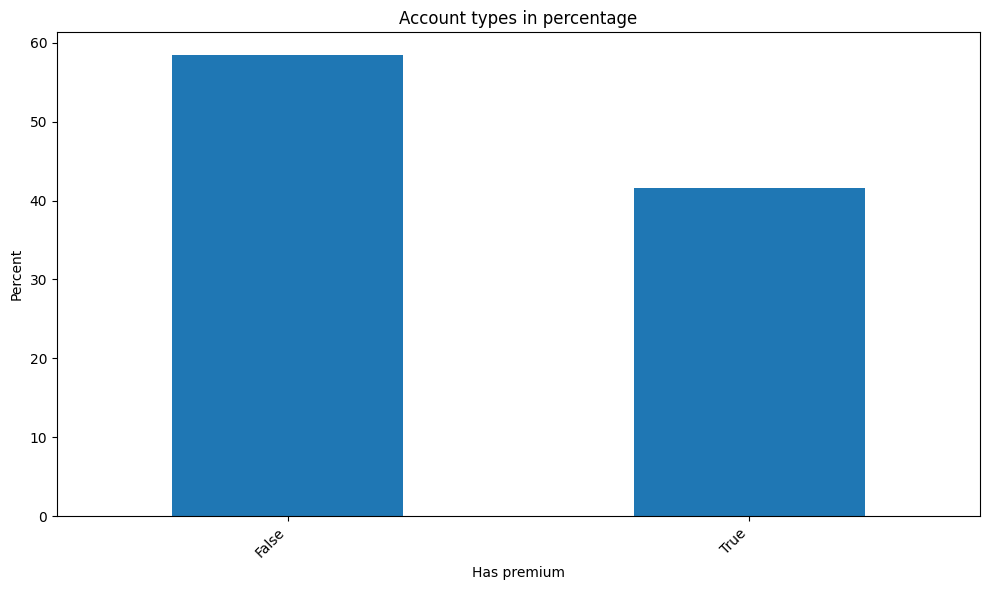

In [44]:
file_path = 'content/artists.jsonl'
artists = pd.read_json(file_path, lines=True, encoding='utf-8')

file_path = 'content/users.jsonl'
with open(file_path, 'r', encoding='utf-8') as file:
    users_dict = [json.loads(line) for line in file]

genre_counter = {}
for genres in artists['genres']:
    for genre in genres:
        genre_counter[genre] = genre_counter.get(genre, 0) + 1

user_counter = {}
for user in users_dict:
    for genre in user.get('favourite_genres', []):
        if genre not in user_counter:
            user_counter[genre] = [0, 0]  # [total_users, premium_users]
        user_counter[genre][0] += 1
        if user.get('premium_user', False):
            user_counter[genre][1] += 1

file_path = 'content/users.jsonl'
users_df = pd.read_json(file_path, lines=True, encoding='utf-8')
users_premium_counts = users_df['premium_user'].value_counts()


percentages = (users_premium_counts / users_premium_counts.sum()) * 100

plt.figure(figsize=(10, 6))
percentages.plot(kind='bar')
plt.title("Account types in percentage")
plt.ylabel("Percent")
plt.xlabel("Has premium")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Użytkownicy premium są w klasie mniejszościowej, ale stanowią znaczącą część wszystkich użytkowników (40% w porównaniu do 60% użytkowników nie-premium). 

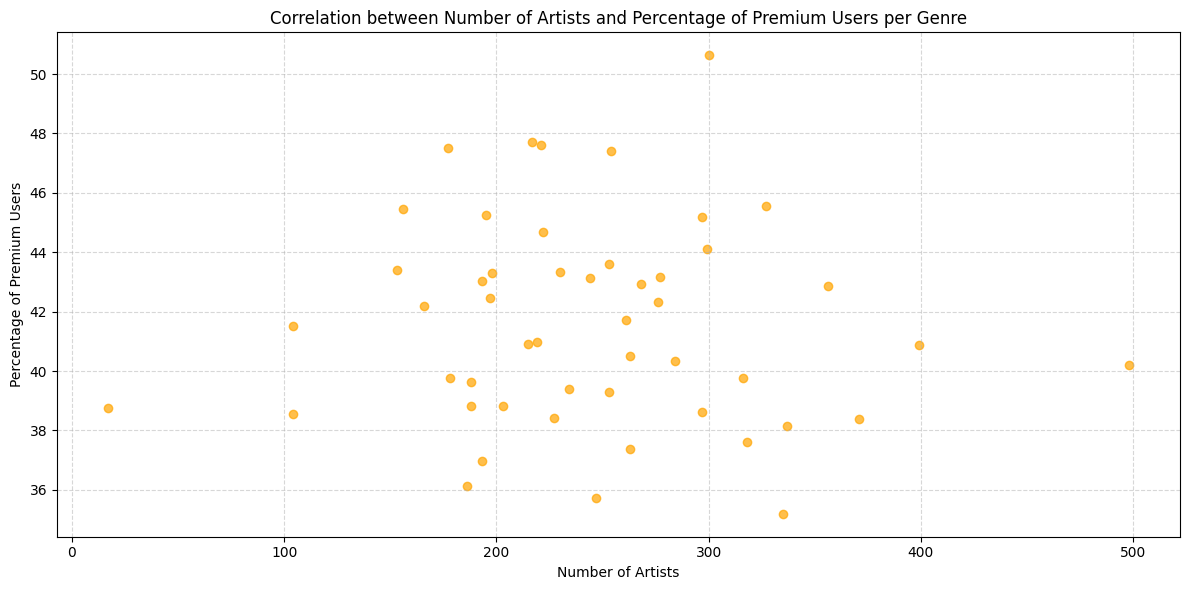

In [45]:
plt.figure(figsize=(12, 6))
plt.scatter(num_bands, premium_percentage, color='orange', alpha=0.7)

for i, genre in enumerate(genres):
    if genre in user_counter:
        plt.text(num_bands[i], premium_percentage[i], genre, fontsize=6, ha='right', va='bottom')

plt.xlabel('Number of Artists')
plt.ylabel('Percentage of Premium Users')
plt.title('Correlation between Number of Artists and Percentage of Premium Users per Genre')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [46]:
cities = {}
for user in users_dict:
  city = user.get('city')
  if city not in cities:
    cities[city] = [cities.get(city, 0) + 1, 1 if user.get('premium_user') else 0]
  else:
    cities[city][0] += 1
    cities[city][1] += 1 if user.get('premium_user') else 0

geolocator = Nominatim(user_agent="geoapi")

locations = []
for city, users in cities.items():
    location = geolocator.geocode(city + ", Poland")
    if location:
        locations.append((location.latitude, location.longitude, users[0]))

m = folium.Map(location=[52.237049, 21.017532], zoom_start=6)  # Centrum Polski

heat_data = [(lat, lon, count) for lat, lon, count in locations]
HeatMap(heat_data).add_to(m)
# m.save("poland_heatmap.html")

m


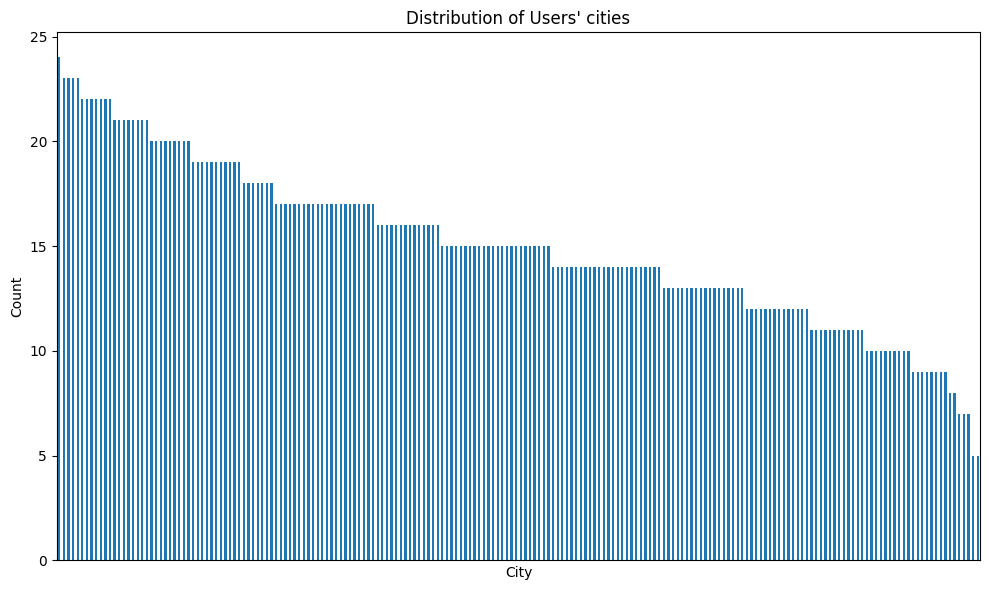

In [47]:
user_city_counts = users_df['city'].value_counts()

plt.figure(figsize=(10, 6))
user_city_counts.plot(kind='bar')
plt.title("Distribution of Users' cities")
plt.ylabel("Count")
plt.xlabel("City")
plt.xticks([])
plt.tight_layout()
plt.show()

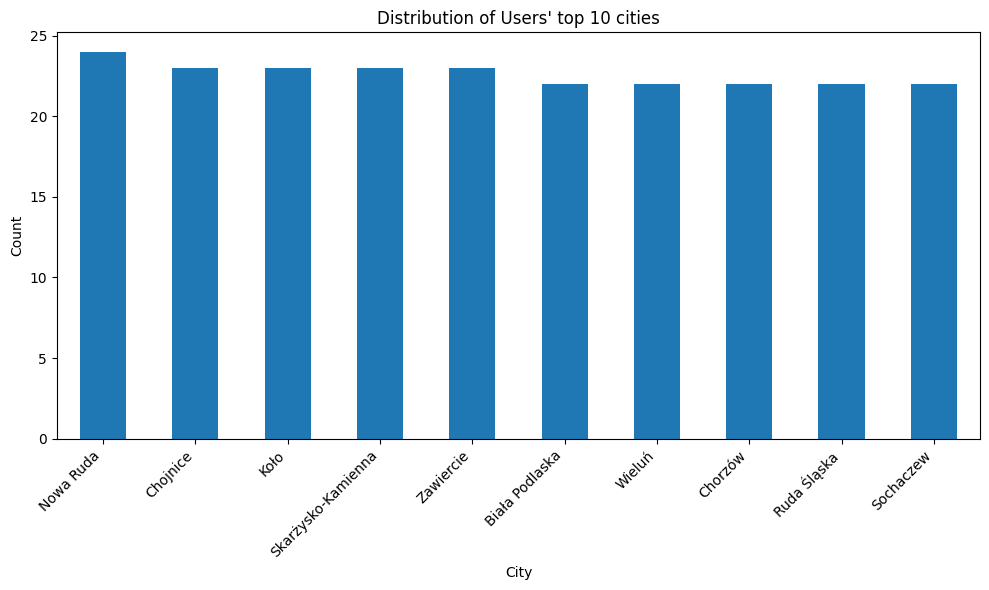

In [48]:
plt.figure(figsize=(10, 6))
user_city_counts.head(10).plot(kind='bar')
plt.title("Distribution of Users' top 10 cities")
plt.ylabel("Count")
plt.xlabel("City")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Użytkownicy pochodzą z różnych miast, ale największa liczba użytkowników nie pochodzi z największych ośrodków populacji. Może to sugerować, że mieszkańcy miast takich jak Warszawa są niedoreprezentowani w danych w stosunku do ich liczebności.

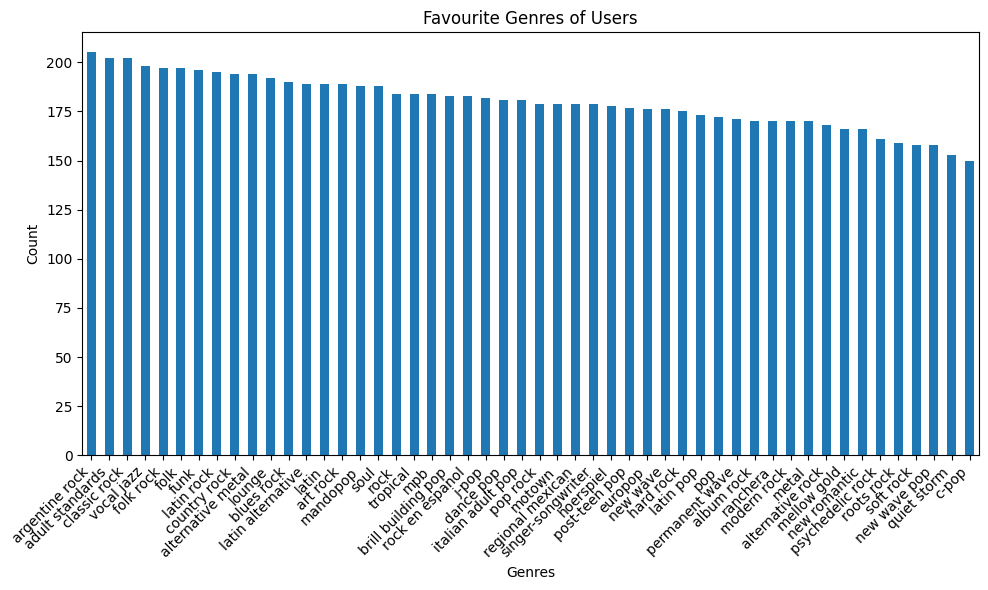

In [49]:
favourite_genres_flat = [genre for sublist in users_df['favourite_genres'] for genre in sublist]

genre_counts_users = pd.Series(favourite_genres_flat).value_counts()

plt.figure(figsize=(10, 6))
genre_counts_users.plot(kind='bar')
plt.title("Favourite Genres of Users")
plt.ylabel("Count")
plt.xlabel("Genres")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Liczba użytkowników na ulubiony gatunek rozkłada się równomiernie.

##### Zbiór `Artists`

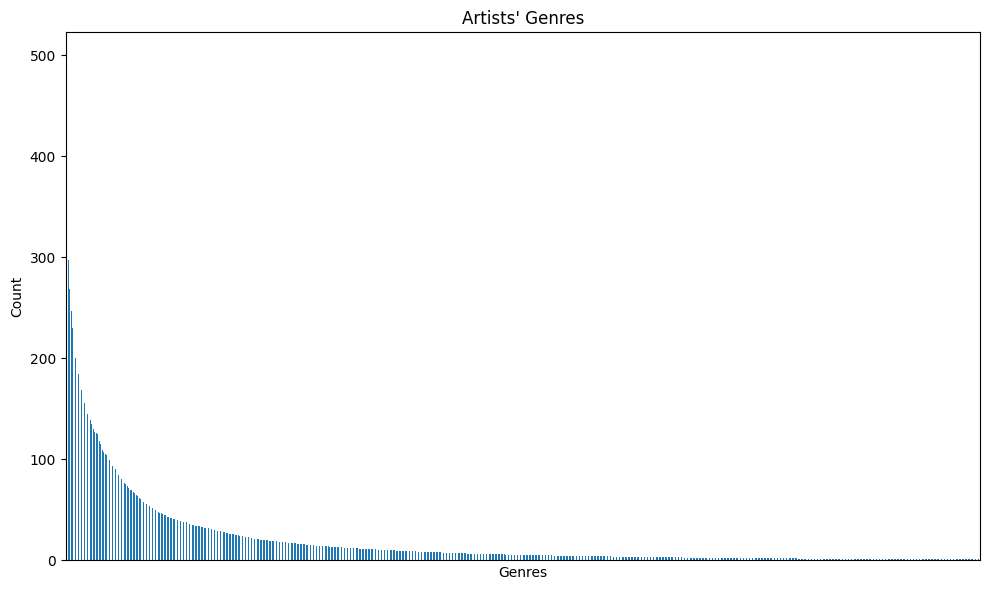

In [50]:
genres_flat = [genre for sublist in artists['genres'] for genre in sublist]

genre_counts_users = pd.Series(genres_flat).value_counts()

plt.figure(figsize=(10, 6))
genre_counts_users.plot(kind='bar')
plt.title("Artists' Genres")
plt.ylabel("Count")
plt.xlabel("Genres")
plt.xticks([])
plt.tight_layout()
plt.show()


Niektóre gatunki są nadreprezentowane przez artystów w porównaniu z innymi.

##### Zbiór `Sessions`

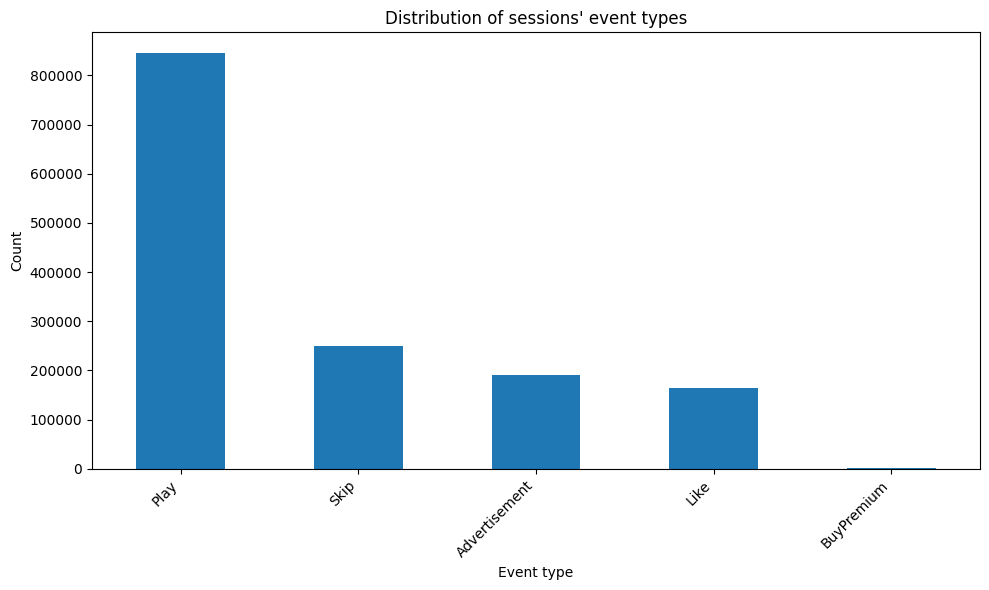

In [51]:
sessions_event_type_counts = sessions['event_type'].value_counts()

plt.figure(figsize=(10, 6))
sessions_event_type_counts.plot(kind='bar')
plt.title("Distribution of sessions' event types")
plt.ylabel("Count")
plt.xlabel("Event type")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Zdecydowanie najczęstszym zdarzeniem jest odtworzenie utworu. Polubienie utworu, pominięcie i odtworzenie reklamy występuje z podobną częstością. Zakup konta jest możliwy raz na miesiac dla jednego konta dlatego występuje najrzadziej.

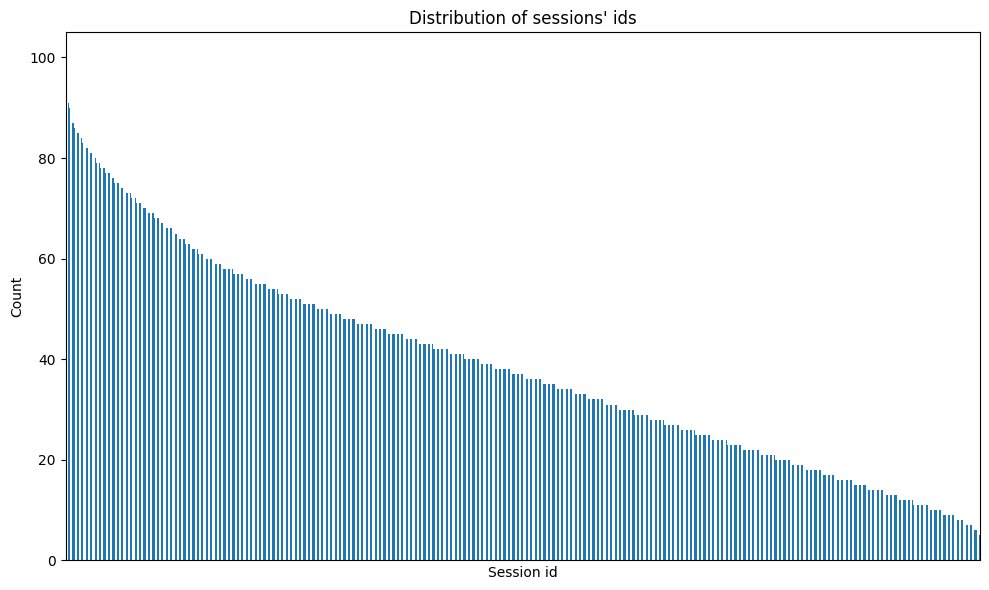

In [52]:
session_id_counts = sessions['session_id'].value_counts()

plt.figure(figsize=(10, 6))
session_id_counts.plot(kind='bar')
plt.title("Distribution of sessions' ids")
plt.ylabel("Count")
plt.xlabel("Session id")
plt.xticks([])
plt.tight_layout()
plt.show()

Sesje mają różną długość - liczbę zdarzeń, które były w ich czasie wykonane.

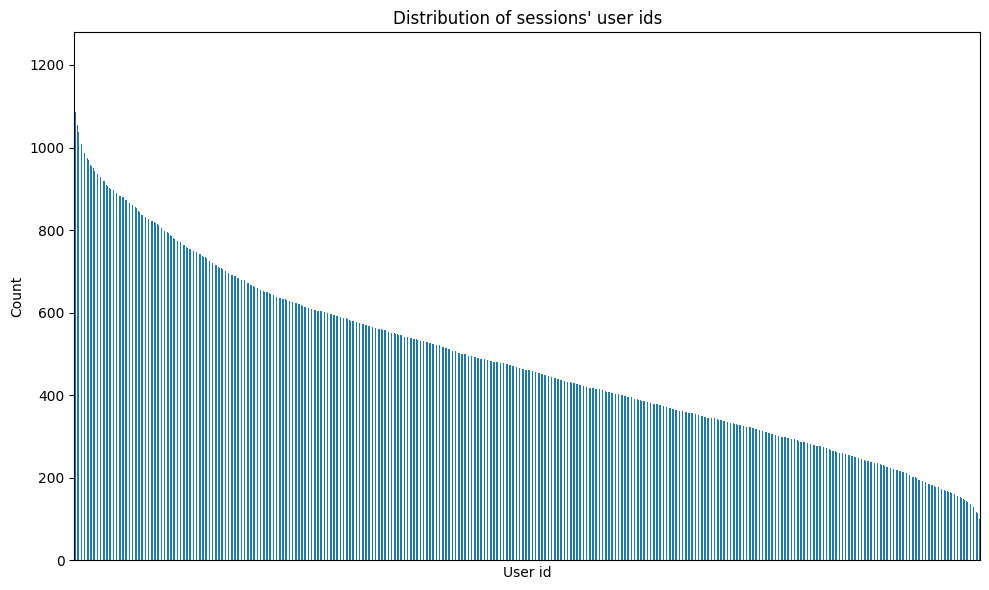

In [53]:
session_user_id_counts = sessions['user_id'].value_counts()

plt.figure(figsize=(10, 6))
session_user_id_counts.plot(kind='bar')
plt.title("Distribution of sessions' user ids")
plt.ylabel("Count")
plt.xlabel("User id")
plt.xticks([])
plt.tight_layout()
plt.show()

Ten wykres jest spójny z wykresem przedstawiającym id sesji. "Dłuższe" sesje - o większej liczbie wpisów o zdarzeniach - mają powtarzające się id użytkownika.

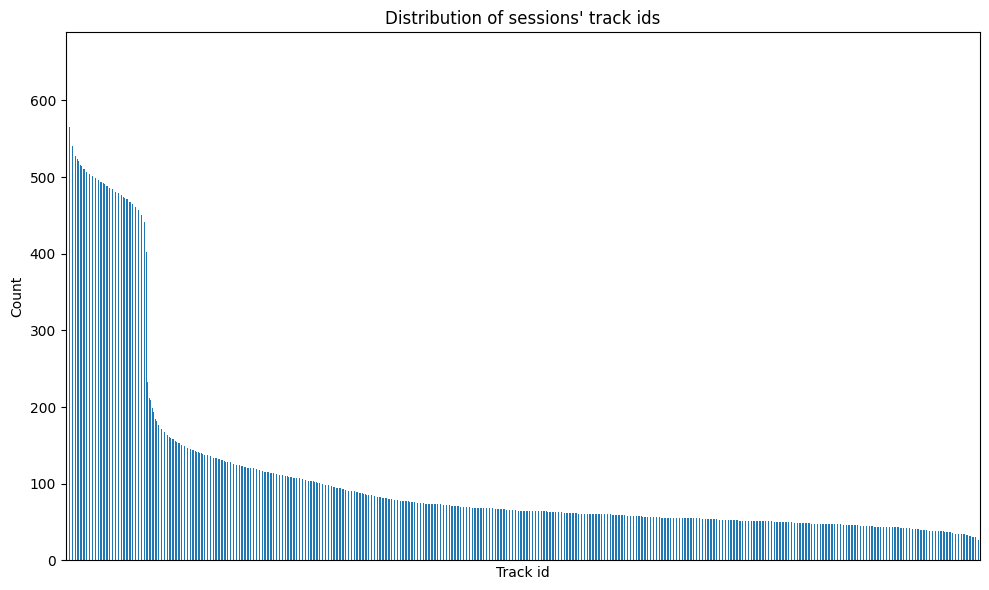

In [54]:
session_user_id_counts = sessions['track_id'].value_counts()

plt.figure(figsize=(10, 6))
session_user_id_counts.plot(kind='bar')
plt.title("Distribution of sessions' track ids")
plt.ylabel("Count")
plt.xlabel("Track id")
plt.xticks([])
plt.tight_layout()
plt.show()

Część utworów jest znacznie częściej odtwarzana od innych.

##### Zbiór `Tracks`

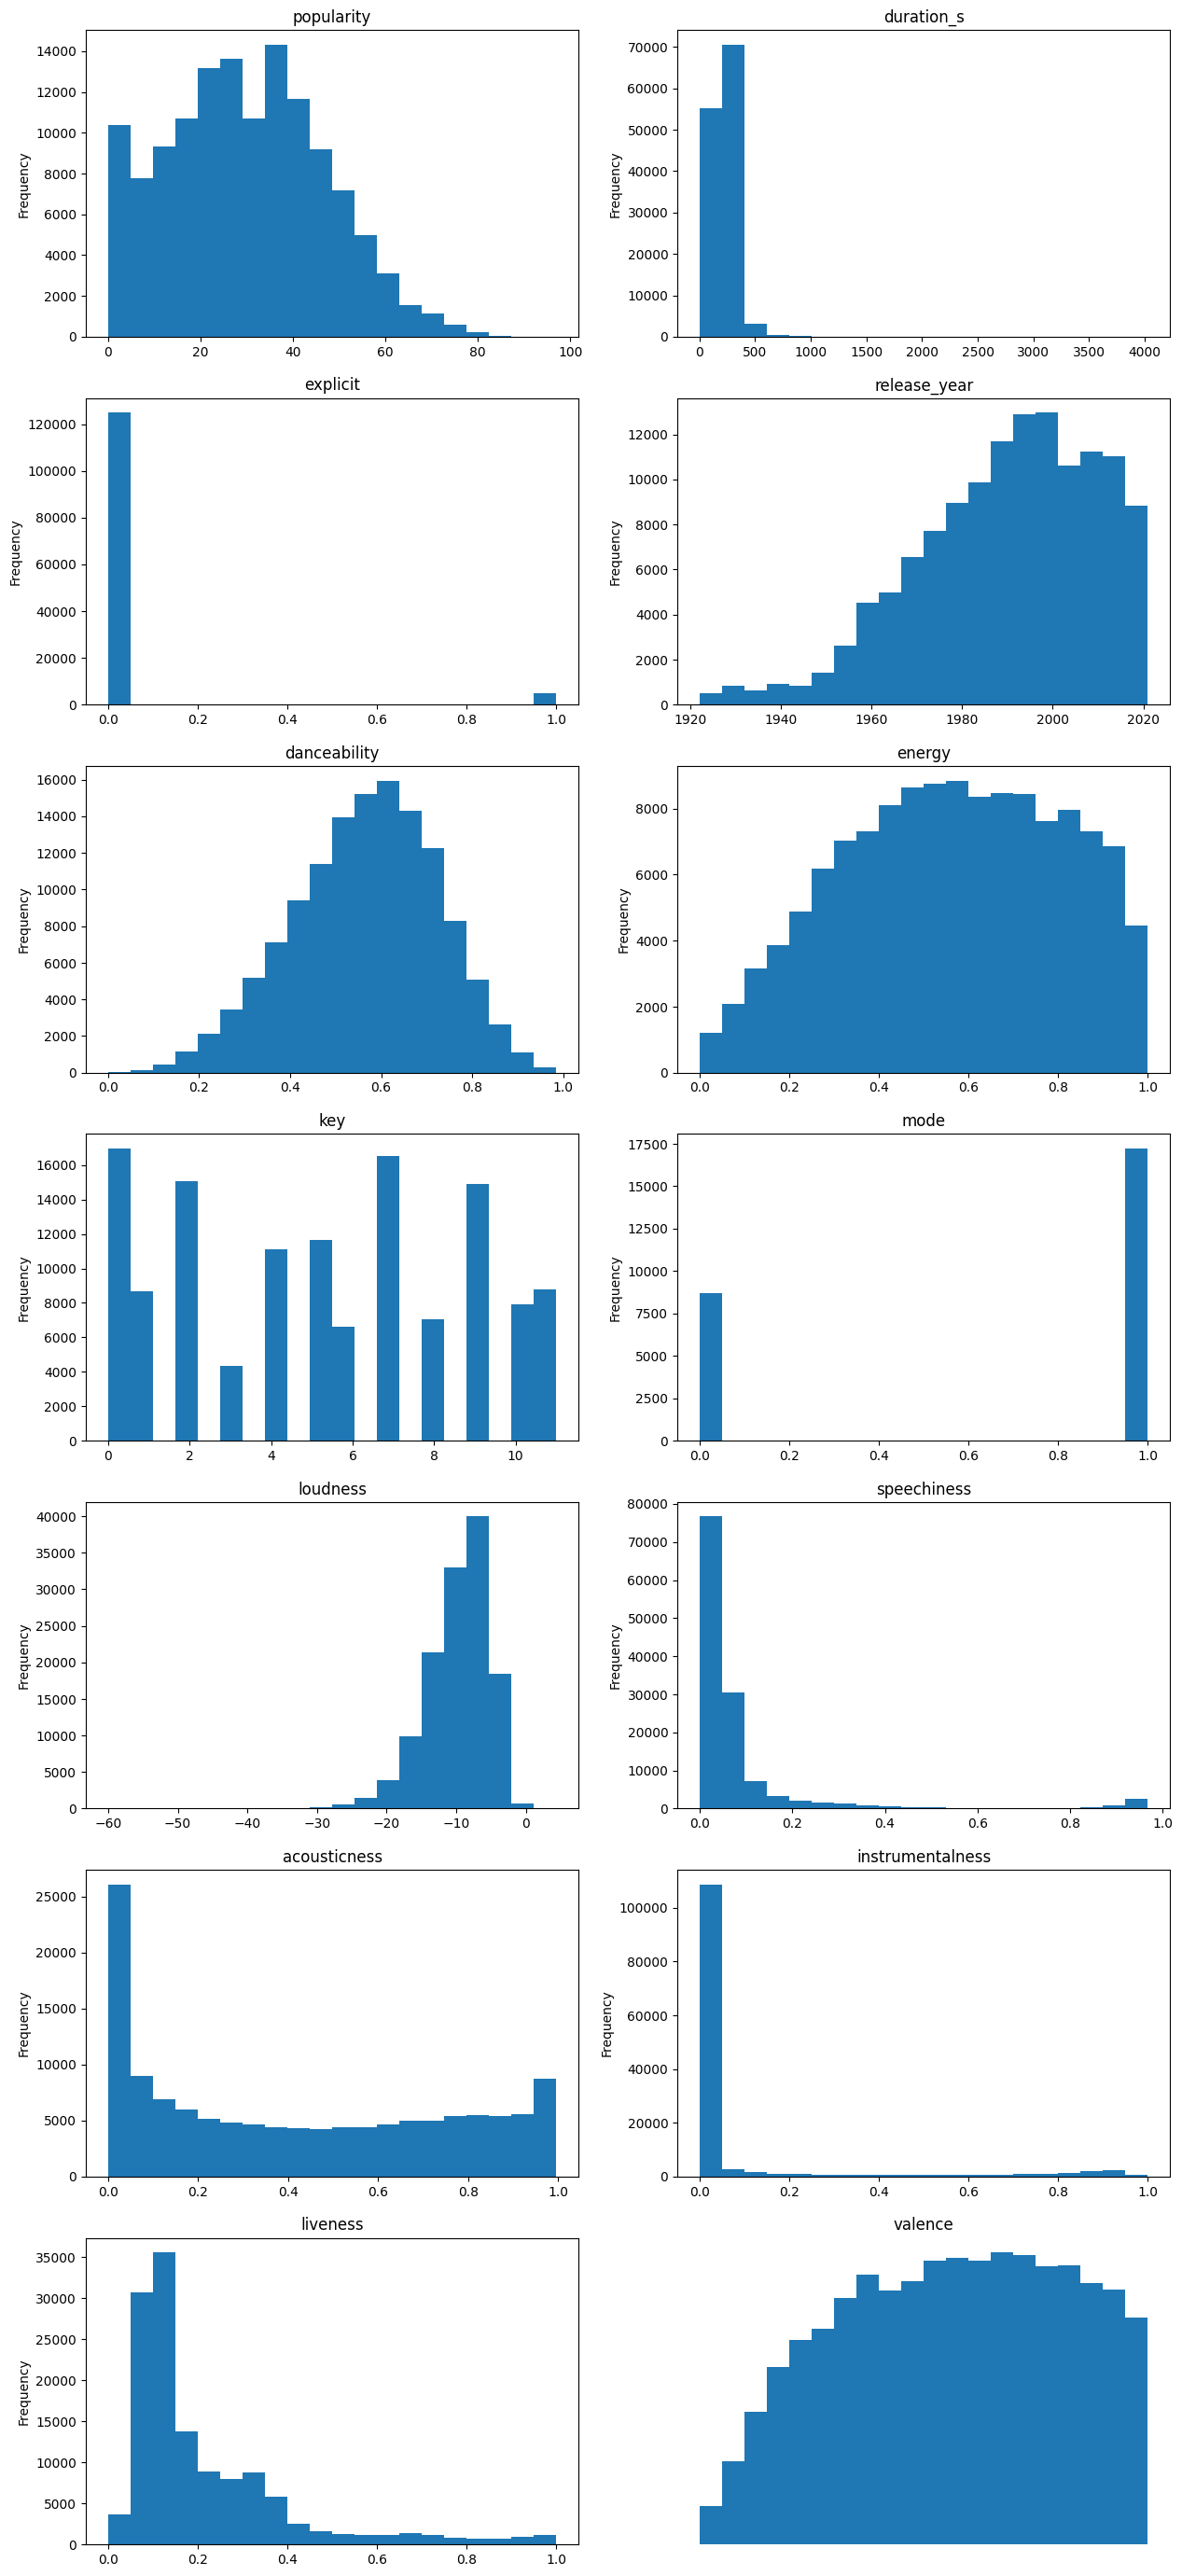

In [56]:
tracks['release_year'] = tracks['release_date'].str[:4].astype(int) 
#okazało się, że część danych w tej kolumnie to sam rok, a część ma też miesiac i dzień po myślniku

tracks['duration_s'] = tracks['duration_ms'] / 1000

X_here = tracks[[#'id', 'artist_id', 'name',
    'popularity', #'duration_ms',
    'duration_s', 'explicit', #'release_date',
    'release_year', 'danceability', 'energy', 'key', 'mode', 
    'loudness', 'speechiness', 'acousticness', 'instrumentalness', 
    'liveness', 'valence', 'tempo', 'time_signature']]

n_attributes = len(X.keys())

n_cols = 2  
n_rows = (n_attributes // n_cols) + (n_attributes % n_cols > 0)  

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))

axes = axes.flatten()

for idx, (x, ax) in enumerate(zip(X_here.keys(), axes)):
    X_here[x].plot(kind="hist", bins=20, ax=ax)
    ax.set_title(f"{x}")
    # ax.set_xlabel(x) 
    ax.set_ylabel('Frequency')  

for idx in range(n_attributes, len(axes)):
    axes[idx].axis('off')

plt.show()


Dane o dacie publikacji okazały się nieustandaryzowane - wartości tego atrybuty miały różną szczegółowość (z dokładnością do roku lub dnia), dlatego stworzyliśmy atrybut rok publikacji ('release_year'). Wyświetlanie długości trwania utworu w milisekundach również było niepraktyczne, więc dodaliśmy atrybut długość w sekundach ('duration_s').

Znaczna większość utworów jest krótsza niż 500 sekund (ale są też dłuższe niż 3000 sekund), nie jest 'explicit' ani głośna ('loudness'), zawiera mało fragmentów mówionych ('speechiness') i instrumentalnych ('instrumentalness') oraz ma metrum 4/4 ('time_signature==4').
Większość ma tonalność durową ('mode==1'), pochodzi z ostatnich 40 lat, nie jest akustyczna ('acousticness'), żywiołowa ('liveness') ani bardzo popularna ('popularity').
Pozostałe cechy: tanczeność ('danceability'), energiczność ('energy'), tonacja ('key'), wesołość ('valence'), tempo ('tempo') mają rozkład zbliżony do normalnego (krzywej dzwonowej), czyli są w miare zróżnicowane.


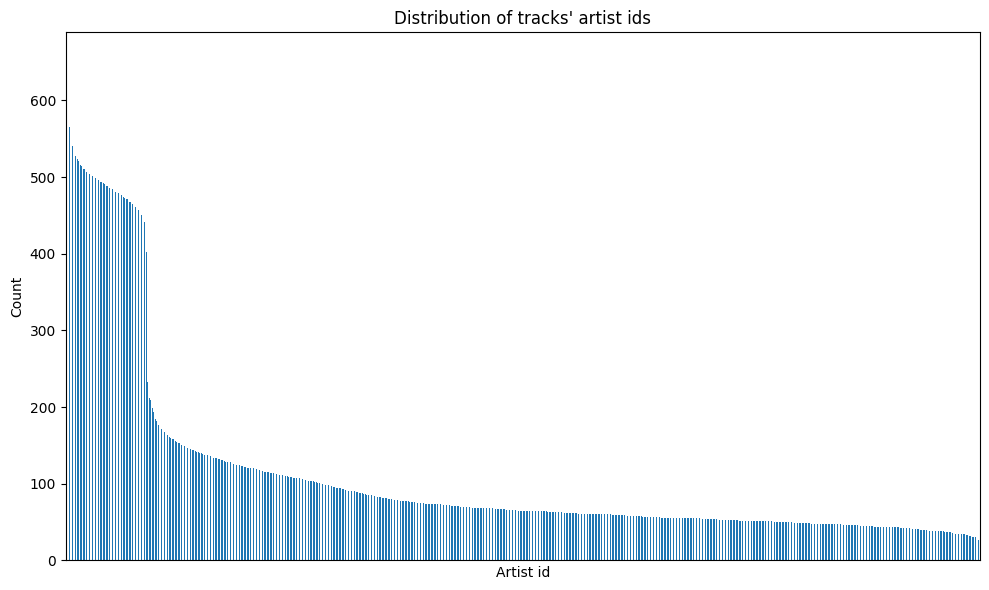

In [57]:
tracks_artist_id_counts = tracks['artist_id'].value_counts()

plt.figure(figsize=(10, 6))
session_user_id_counts.plot(kind='bar')
plt.title("Distribution of tracks' artist ids")
plt.ylabel("Count")
plt.xlabel("Artist id")
plt.xticks([])
plt.tight_layout()
plt.show()

Niektórzy artyści mają więcej utworów w serwisie muzycznym.

##### Zbiór `Track storage`

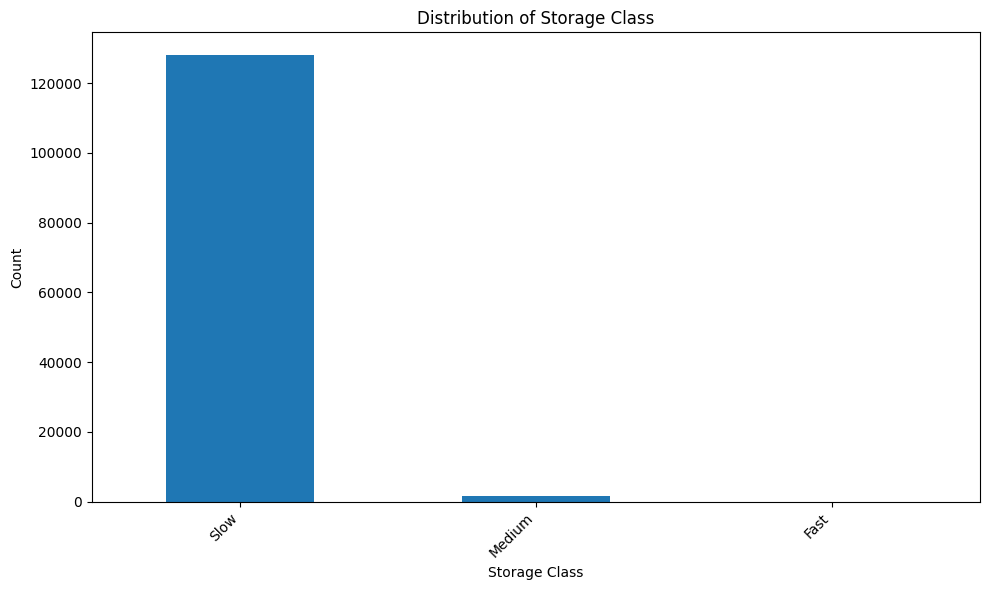

In [58]:
storage_class_counts = track_storage['storage_class'].value_counts()

plt.figure(figsize=(10, 6))
storage_class_counts.plot(kind='bar')
plt.title("Distribution of Storage Class")
plt.ylabel("Count")
plt.xlabel("Storage Class")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Niemal wszystkie utwory są przechowywane w formacie charakteryzującym się powolnym dostępem.

---

#### Informatywność podstawowych atrybutów

Na podstawie dostarczonych danych sprawdziliśmy czy ilość artystów w serwisie oferujących ulubione gatunki użytkownika ma związek z tym czy jest użytkownikiem premium.

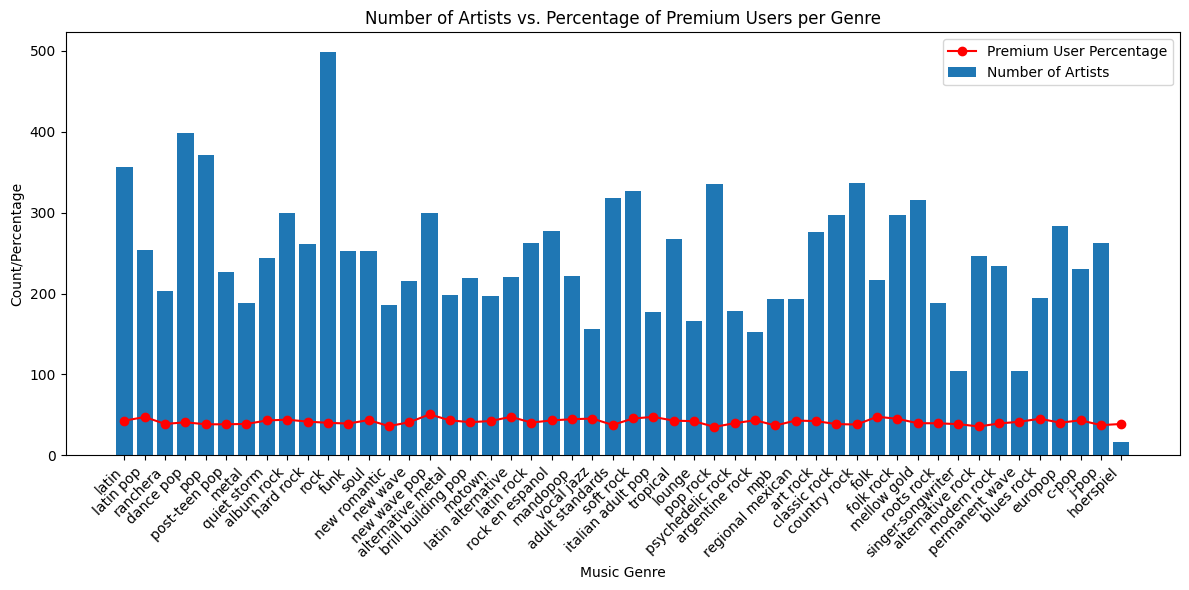

In [62]:
plt.figure(figsize=(12, 6))
plt.bar(genres, num_bands, label='Number of Artists')
plt.plot(genres, premium_percentage, marker='o', color='red', label='Premium User Percentage')

plt.xlabel('Music Genre')
plt.ylabel('Count/Percentage')
plt.title('Number of Artists vs. Percentage of Premium Users per Genre')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()
print()

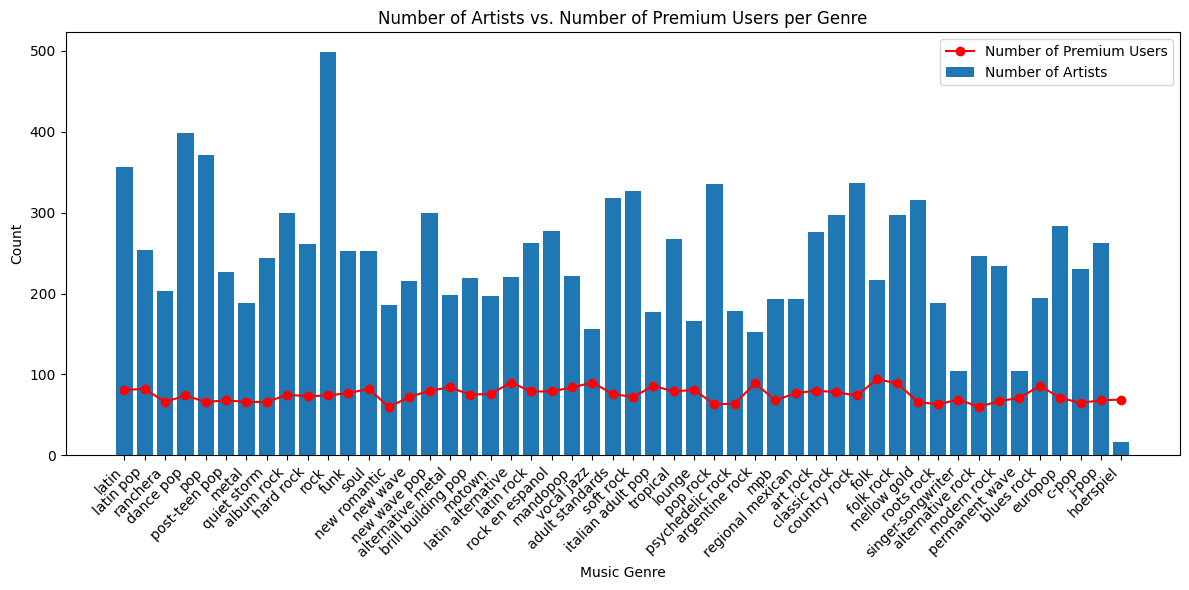

In [63]:
premium_users = [user_counter[genre][0] for genre in genres]
plt.figure(figsize=(12, 6))
plt.bar(genres, num_bands, label='Number of Artists')
plt.plot(genres, premium_users, marker='o', color='red', label='Number of Premium Users')

plt.xlabel('Music Genre')
plt.ylabel('Count')
plt.title('Number of Artists vs. Number of Premium Users per Genre')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

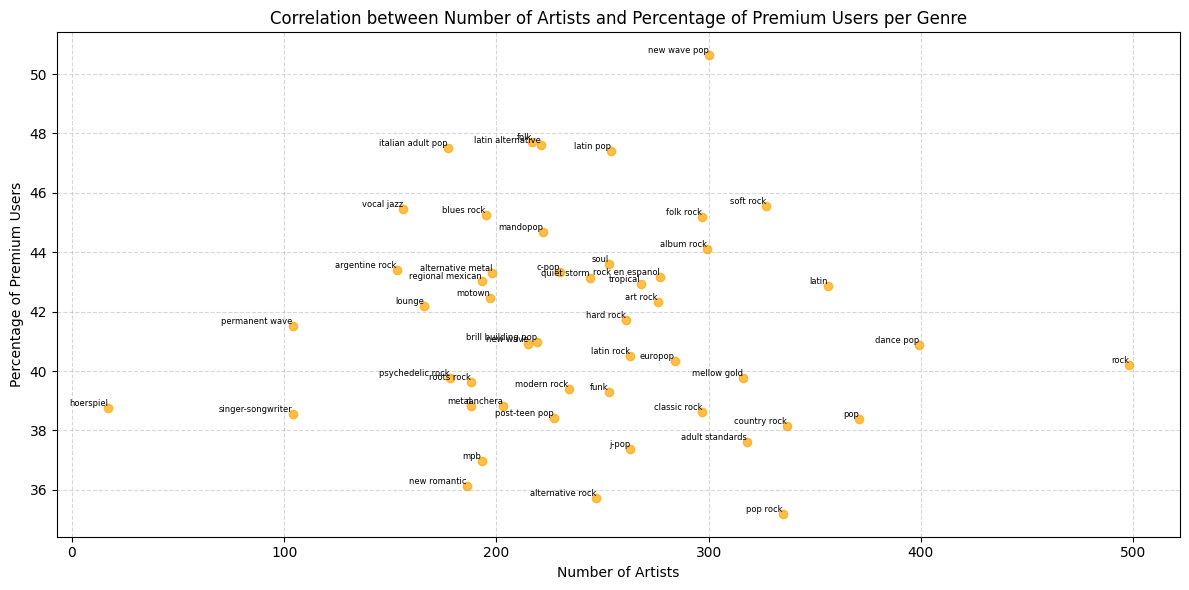

In [64]:
plt.figure(figsize=(12, 6))
plt.scatter(num_bands, premium_percentage, color='orange', alpha=0.7)

for i, genre in enumerate(genres):
    if genre in user_counter:
        plt.text(num_bands[i], premium_percentage[i], genre, fontsize=6, ha='right', va='bottom')

plt.xlabel('Number of Artists')
plt.ylabel('Percentage of Premium Users')
plt.title('Correlation between Number of Artists and Percentage of Premium Users per Genre')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


Jak widać nie ma zauważalnych zależności pomiędzy dostępnością artystów tworzących ulubiony typ muzyki użytkownika a statusem użytkownika.

---

#### Informatywność podstawowych atrybutów
Aby przeanalizować informatywność podstawowych atrybutów wykorzystaliśmy gotowy model regresji liniowej na ustandaryzowanych danych. Po wytrenowaniu jego wagi dają obraz jak informatywne są dane atrybuty.

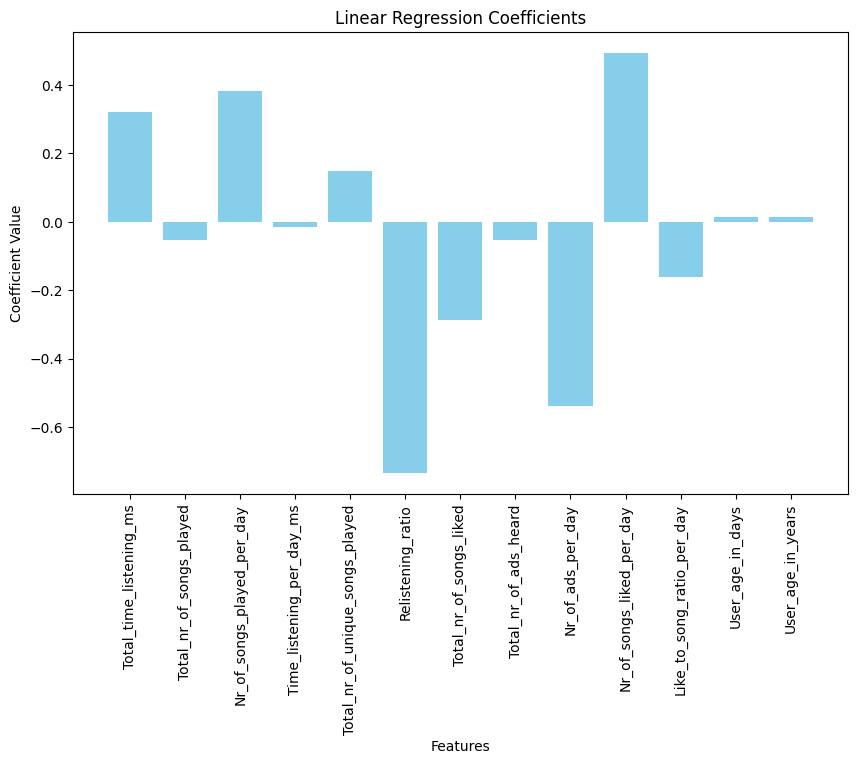

Waga dla atrybutu: 0.3221560440293236 - Total_time_listening_ms
Waga dla atrybutu: -0.053323180063788195 - Total_nr_of_songs_played
Waga dla atrybutu: 0.3830797512384807 - Nr_of_songs_played_per_day
Waga dla atrybutu: -0.014496657005794167 - Time_listening_per_day_ms
Waga dla atrybutu: 0.14797394819527743 - Total_nr_of_unique_songs_played
Waga dla atrybutu: -0.7340029366746715 - Relistening_ratio
Waga dla atrybutu: -0.2862655912235868 - Total_nr_of_songs_liked
Waga dla atrybutu: -0.05218903119111068 - Total_nr_of_ads_heard
Waga dla atrybutu: -0.5385723588783398 - Nr_of_ads_per_day
Waga dla atrybutu: 0.49281903005295585 - Nr_of_songs_liked_per_day
Waga dla atrybutu: -0.1608601855279726 - Like_to_song_ratio_per_day
Waga dla atrybutu: 0.013766610948064306 - User_age_in_days
Waga dla atrybutu: 0.014907320686014719 - User_age_in_years


In [65]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# Standaryzacja wartości w X
scaler = StandardScaler()

X_standardized = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# print(X_standardized)

model = LinearRegression()

# Fit the model to the data
model.fit(X_standardized, Y)
Yp = model.predict(X_standardized)

feature_names = [f'{str(i)}' for i in X_standardized.keys()]  # Change if you have actual names
weights = model.coef_[0]

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(feature_names, model.coef_[0], color='skyblue')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.title('Linear Regression Coefficients')
plt.xticks(rotation=90)
plt.show()

# Get the regression coefficients (parameters)
for ix, v in enumerate(X.keys()):
    print(f"Waga dla atrybutu: {model.coef_[0][ix]} - {v}")

In [66]:
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix
Yps = np.sign(Yp)
print("Rozkład wejściowy:", sum([1 for v in Y.values if v == 1 ])/len(Y))
print("Procent poprawnych predykcji:", sum([1 for ix,y in enumerate(Y.values) if y == Yps[ix]])/len(Y))
print(f"Ilość wartości wygenerowanych predykcji modelu - Premium: {sum([1 for v in np.sign(Yp) if v == 1])}, NonPremium: {sum([1 for v in np.sign(Yp) if v == -1])}")
print(f"Dane wejściowe - Premium: {sum([1 for v in Y.values if v == 1 ])}  NonPremiums: {sum([1 for v in Y.values if v == -1 ])}")

Rozkład wejściowy: 0.416
Procent poprawnych predykcji: 0.891
Ilość wartości wygenerowanych predykcji modelu - Premium: 939, NonPremium: 2061
Dane wejściowe - Premium: 1248  NonPremiums: 1752


Model poprawnie zidentyfikował 89% predykcji, co świadczy o informatywności atrybutów. Wynik ten pochodzi jednak z testów na pojedynczym zbiorze danych, bez walidacji na zbiorze testowym, więc nie można uznać go za miarodajny w kontekście modelowania. Mimo to wynik wskazuje, że zadanie jest wykonalne, a wygenerowane atrybuty są wartościowe (informatywne).